# Content base filtering

## Abstract
It is a method to recommend by sorting similarity by the feature vector of items.
The case where the shop associated with the keyword "hanoi + japanese restaurant" entered by the user at the gourmet site is displayed corresponds. Recommendation based on content is a way to recommend based on the feature of items.

## Vectorize feature
In the first place, why nead to vectorize feature? So in the machine learning, it often appear in some paper or decks.

The definision of "vector" is like below:
Quantity that can be expressed by specifying size and orientation

A set of n real numbers $x_i (i = 1, 2, ⋯, n)$ vertically arranged

$$ 
  X = \left(
    \begin{array}{c}
      x_1 \\
      x_2 \\
      \vdots \\
      x_n
    \end{array}
  \right)
$$

is called an n-dimensional vector on real number field R, or simply called real vector

Let's assume, for example, to capture the feature of a sentence.
We transform sentence to vector firstly.
Why transform to vector? The answer is very simply, it is much easier and faster than take for-loop.

## How do we vectorize?
In this time I would like to make it a feature vector using BoW (Back of word) method.

The concept of BoW is very clear and only counts, so how many times a word has appeared in the target sentence.

This is sample sentence:
```
The sun is shining
The weather is sweet
The sun is shining, the weather is sweet, and one and is two
```
Try to write down any words in this sentence.
```
the, sun, is, shining,weather, sweet, and, one, two
```
In this case, "The" is same as "the". So there are 9 words.

Make these associately each other and uniquly.

In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
words_ = np.array(['The sun is shining',
                                   'The weather is sweet',
                                   'The sun is shining, the weather is sweet, and one and is two'])
counts_ = vectorizer.fit_transform(words_)
print(vectorizer.vocabulary_)
print(counts_.toarray())

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}
[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 1 1 1 1 2 1 1]]


Shaping:

In [24]:
import pandas as pd
df = pd.DataFrame(counts_.toarray())
df.columns = ["and(x1)", "is(x2)", "one(x3)", "shiging(x4)", "sun(x5)", "sweet(x6)", "the(x7)", "two(x8)", "weather(x9)"]
df

,and(x1),is(x2),one(x3),shiging(x4),sun(x5),sweet(x6),the(x7),two(x8),weather(x9)
0,0,1,0,1,1,0,1,0,0
1,0,1,0,0,0,1,1,0,1
2,2,3,1,1,1,1,2,1,1


Actually, work continue after this.  
But today, we have no time to explain all things.  
I think that the process could be explained sufficiently enough.

And also, "BoW" is so usefull but nowerdays "word2vec" is better solution for that.
But today's mainly agenda is not NLP, so that I don't explain about this.

## let's try to impletent Content based filtering!
data A, and B are the news text of World cup.

### 1st. Calc similarity
`Cosine simularity` is better.
It is so easy to calc by transform to vector.
You can imagine like below:
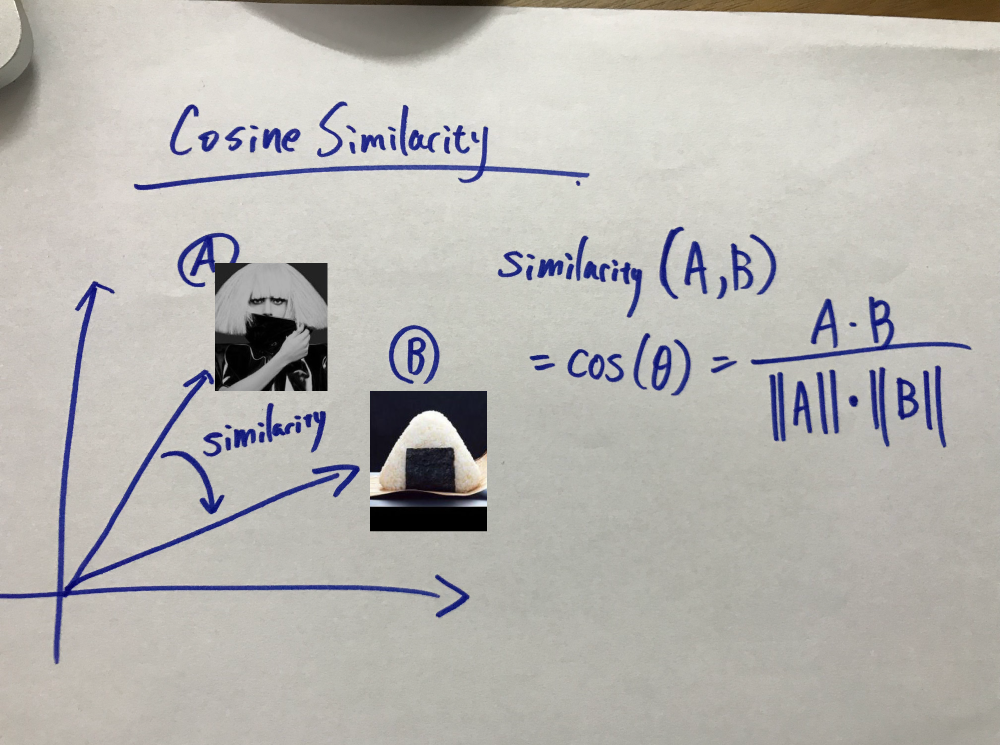

In [50]:
from math import sqrt

In [51]:
def calc_sim(text_a, text_b):
    b_dict = {key: value for key, value in text_b}
    
    # A * B
    ab = 0
    for key, value in text_a:
        value_b = b_dict.get(key)
        if value_b:
            ab += float(value * value_b)
            
    # |A| and |B|
    a = sqrt(sum([v ** 2 for k, v in text_a]))
    b = sqrt(sum([v ** 2 for k, v in text_b]))
    return float(ab / (a * b))

### 2nd. Impletent CBF class

In [52]:
class ContentBaseFiltering:
    def __init__(self, item_1, item_2):
        self.item_1 = item_1
        self.item_2 = item_2
        
    def calculate_simularity_by_cosine(self):
        sim = None
        item_2_dict = {key: value for key, value in self.item_2}
        
        ab = 0
        for key, value in self.item_1:
            value2 = item_2_dict.get(key)
            if value2:
                ab += float(value * value2)
                
        a = sqrt(sum([v ** 2 for k, v in self.item_1]))
        b = sqrt(sum([v ** 2 for k, v in self.item_2]))
        sim = float(ab / (a * b))
        return sim

### 3rd. Pre-Processing datas
use `TF-IDF` to add weight

In [64]:
import os 
print(os.getcwd())
os.chdir('../../data')

/Users/maki/dev/src/github.com/simula-labs/tech_note_for_machine_learning/data


FileNotFoundError: [Errno 2] No such file or directory: '../../data'

In [54]:
file_a = open('world_cup_a.txt', 'r')
file_b = open('world_cup_b.txt', 'r')
text_a = file_a.read()
text_b = file_b.read()
file_a.close()
file_b.close()


In [55]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
words_ = np.array([text_a, text_b])
a_counts_ = vectorizer.fit_transform(words_)[0]
b_counts_ = vectorizer.fit_transform(words_)[1]

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, norm='l2', smooth_idf=True, stop_words=['the', 'in', 'group', 'of', 'to', 'and', 'will', 'on', 'but', '103', '12', '14', '16', '17'])
np.set_printoptions(precision=2)
tfidf = vectorizer.fit_transform(words_).toarray()
tfidf_a = tfidf[0]
tfidf_b = tfidf[1]
labels_ = vectorizer.get_feature_names()

In [57]:
import pandas as pd
df = pd.DataFrame(tfidf)
df.columns = labels_
df

,2010,2018,64th,65,aaron,ability,about,above,abundant,added,...,would,wrong,xherdan,years,yoshida,you,young,youth,zlatan,zuber
0,0.022048,0.022048,0.000000,0.000000,0.022048,0.022048,0.044096,0.000000,0.022048,0.000000,...,0.031375,0.022048,0.022048,0.022048,0.022048,0.022048,0.022048,0.022048,0.022048,0.022048
1,0.000000,0.000000,0.063649,0.063649,0.000000,0.000000,0.000000,0.063649,0.000000,0.063649,...,0.045287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [58]:
series_a = df.sort_values(by=0, axis=1, ascending=False)[:1]
series_b = df.sort_values(by=1, axis=1, ascending=False)[1:2]
series_a

,have,with,be,qualifying,for,is,their,world,they,it,...,minutes,hat,our,lead,re,later,pass,past,penalty,places
0,0.203936,0.203936,0.188249,0.176385,0.172561,0.172561,0.172561,0.156874,0.154336,0.141186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
series_b

,minutes,messi,world,match,dream,haiti,argentina,cup,against,team,...,hitters,hipster,high,hernandez,hernan,here,heavyweight,he,having,zuber
1,0.254595,0.226433,0.226433,0.190946,0.190946,0.190946,0.181147,0.181147,0.13586,0.13586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
A = [[key, value[0]] for key, value in series_a.to_dict().items()]
A

[['have', 0.20393598844931282],
 ['with', 0.20393598844931282],
 ['be', 0.18824860472244262],
 ['qualifying', 0.17638456372495928],
 ['for', 0.1725612209955724],
 ['is', 0.1725612209955724],
 ['their', 0.1725612209955724],
 ['world', 0.15687383726870216],
 ['they', 0.15433649325933937],
 ['it', 0.14118645354183196],
 ['while', 0.13228842279371944],
 ['which', 0.13228842279371944],
 ['one', 0.13228842279371944],
 ['england', 0.13228842279371944],
 ['teams', 0.11024035232809955],
 ['germany', 0.11024035232809955],
 ['who', 0.11024035232809955],
 ['are', 0.10981168608809153],
 ['against', 0.09412430236122131],
 ['russia', 0.09412430236122131],
 ['as', 0.09412430236122131],
 ['tournament', 0.09412430236122131],
 ['brazil', 0.08819228186247964],
 ['well', 0.08819228186247964],
 ['uruguay', 0.08819228186247964],
 ['at', 0.08819228186247964],
 ['this', 0.08819228186247964],
 ['arabia', 0.08819228186247964],
 ['south', 0.08819228186247964],
 ['favourites', 0.08819228186247964],
 ['quality', 0.

In [61]:
B = [[key, value[1]] for key, value in series_b.to_dict().items()]
B

[['minutes', 0.2545951135924548],
 ['messi', 0.22643315024657057],
 ['world', 0.22643315024657057],
 ['match', 0.1909463351943411],
 ['dream', 0.1909463351943411],
 ['haiti', 0.1909463351943411],
 ['argentina', 0.18114652019725644],
 ['cup', 0.18114652019725644],
 ['against', 0.13585989014794234],
 ['team', 0.13585989014794234],
 ['that', 0.13585989014794234],
 ['their', 0.13585989014794234],
 ['his', 0.13585989014794234],
 ['we', 0.13585989014794234],
 ['before', 0.1272975567962274],
 ['going', 0.1272975567962274],
 ['scored', 0.1272975567962274],
 ['barcelona', 0.1272975567962274],
 ['warm', 0.1272975567962274],
 ['victory', 0.1272975567962274],
 ['said', 0.1272975567962274],
 ['into', 0.1272975567962274],
 ['scoring', 0.1272975567962274],
 ['after', 0.09057326009862822],
 ['up', 0.09057326009862822],
 ['have', 0.09057326009862822],
 ['was', 0.09057326009862822],
 ['had', 0.09057326009862822],
 ['time', 0.09057326009862822],
 ['two', 0.09057326009862822],
 ['following', 0.09057326009

### 4th. Calc with CBF model

In [62]:
cbf = ContentBaseFiltering(A, B)
cbf.calculate_simularity_by_cosine()

0.2749359236495172